# TWITTER SENTIMENT ANALYSIS

## Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

## Load the Data Set

In [3]:
df = pd.read_csv('twitter_training.csv', header=None)

In [4]:
df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
df.columns = ['twitter_id', 'entity', 'sentiment', 'tweet_content']
df.head()

,twitter_id,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   twitter_id     74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [7]:
df.drop(['twitter_id'], axis=1, inplace=True)

In [8]:
df = df[df['sentiment'] != 'Irrelevant']

In [9]:
df.head()

,entity,sentiment,tweet_content
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


## Visualization

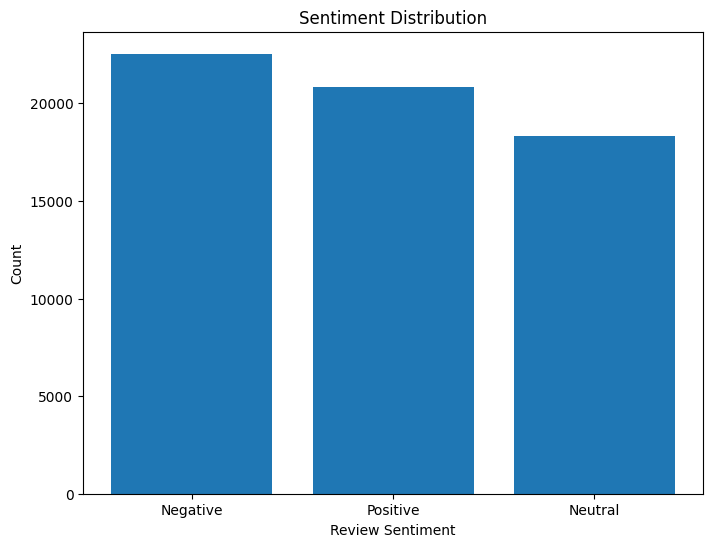

In [10]:
sentiment_counts = df['sentiment'].value_counts()

# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Review Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [11]:
df["Source_text"]= df["tweet_content"].astype(str) +" "+ df["entity"].astype(str)
df.drop(['tweet_content', 'entity'], axis=1, inplace=True)

In [12]:
df.head()

,sentiment,Source_text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [13]:
li=list(df["Source_text"])
def clean_text(text):
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    custom_stopword = 'im'
    stop_words.add(custom_stopword)
    tokens = text.lower().split()
    text = ' '.join([word for word in tokens if word not in stop_words])
    
    return text
df['Cleaned_text']=df['Source_text'].apply(clean_text)

In [14]:
df.head()

,sentiment,Source_text,Cleaned_text
0,Positive,im getting on borderlands and i will murder yo...,getting borderlands murder borderlands
1,Positive,I am coming to the borders and I will kill you...,coming borders kill borderlands
2,Positive,im getting on borderlands and i will kill you ...,getting borderlands kill borderlands
3,Positive,im coming on borderlands and i will murder you...,coming borderlands murder borderlands
4,Positive,im getting on borderlands 2 and i will murder ...,getting borderlands murder borderlands


In [15]:
df.drop(['Source_text'], axis=1, inplace=True)

In [16]:
df.head()

,sentiment,Cleaned_text
0,Positive,getting borderlands murder borderlands
1,Positive,coming borders kill borderlands
2,Positive,getting borderlands kill borderlands
3,Positive,coming borderlands murder borderlands
4,Positive,getting borderlands murder borderlands


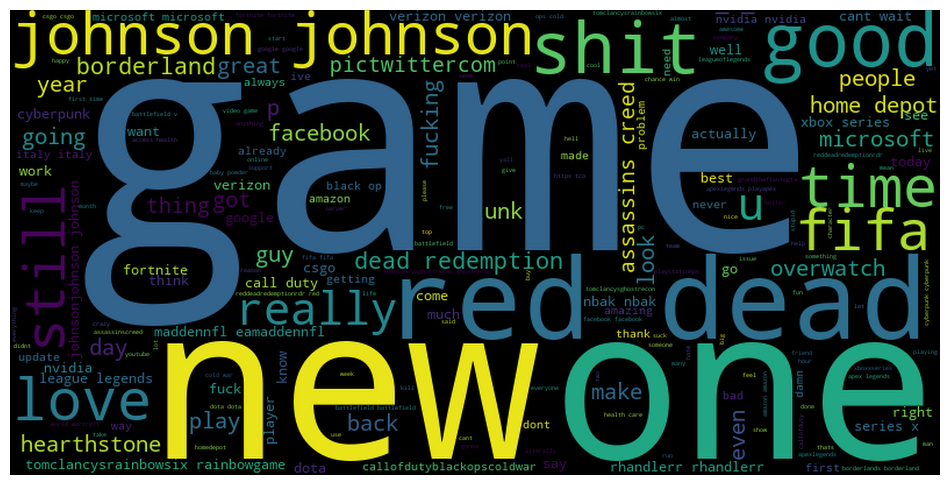

In [17]:
all_text = ' '.join(df['Cleaned_text'].values)
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)

plt.figure(figsize=(12, 9))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis('off')
plt.show()

### Wordcloud for Most occuring words for positive review

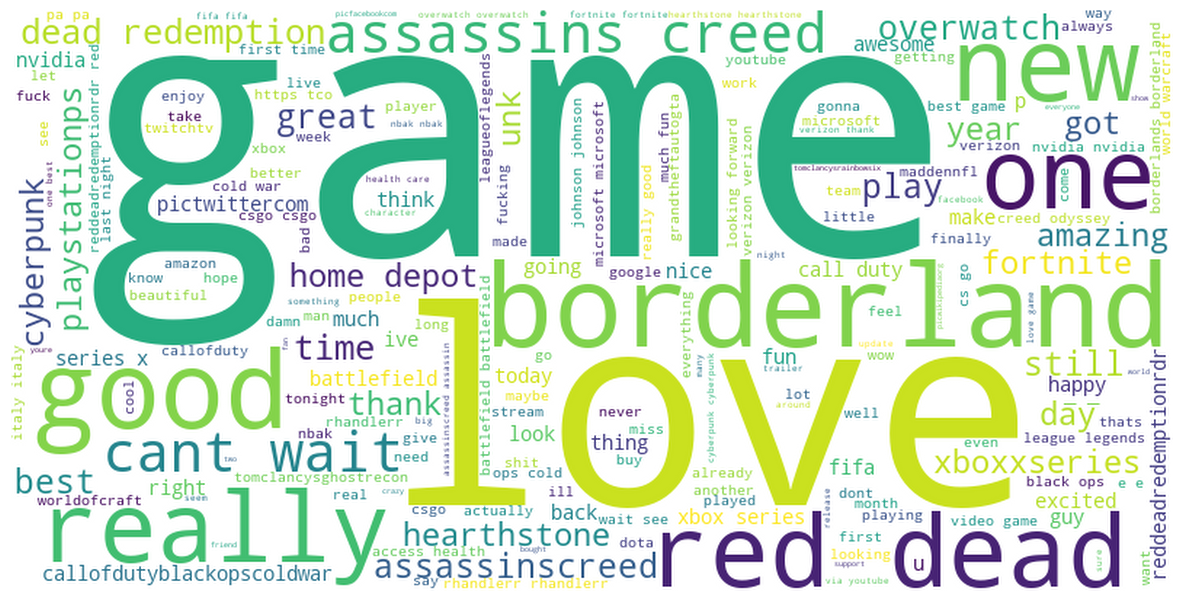

In [18]:
filtered_df = df[df['sentiment'] == 'Positive']
positive_text = ' '.join(filtered_df['Cleaned_text'].values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis('off')
plt.show()

### Wordcloud for Most occuring words for negative review

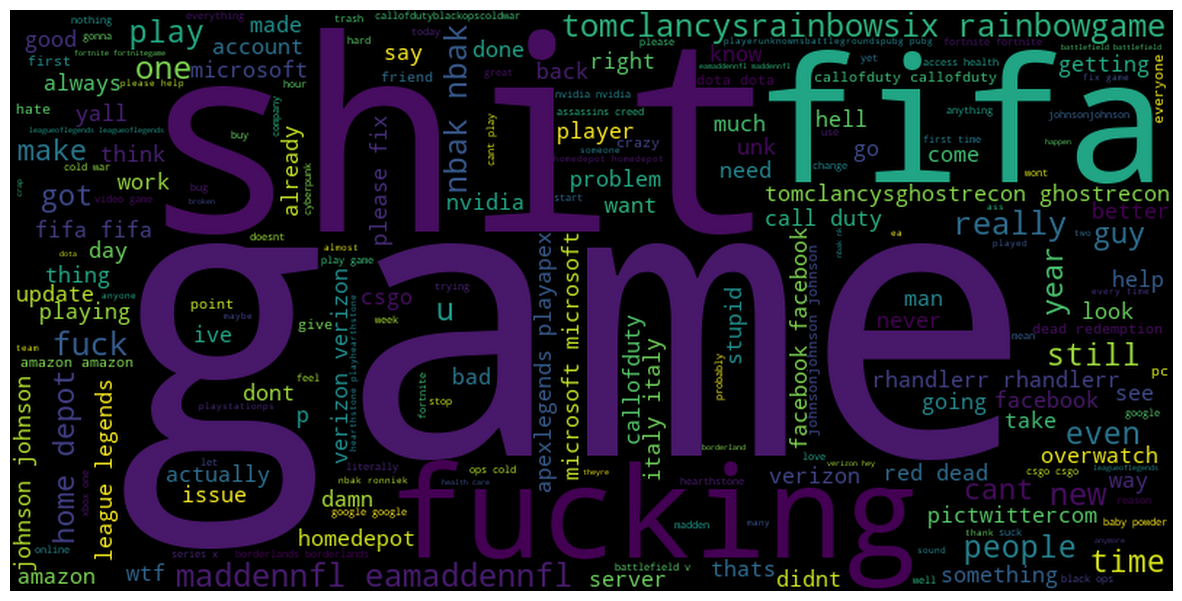

In [19]:
filtered_df = df[df['sentiment'] == 'Negative']
negative_text = ' '.join(filtered_df['Cleaned_text'].values)
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis('off')
plt.show()

In [20]:
df.head()

,sentiment,Cleaned_text
0,Positive,getting borderlands murder borderlands
1,Positive,coming borders kill borderlands
2,Positive,getting borderlands kill borderlands
3,Positive,coming borderlands murder borderlands
4,Positive,getting borderlands murder borderlands


## Data Cleaning and Preprocessing on Test Data

In [21]:
test_df = pd.read_csv('twitter_validation.csv', header=None)

In [22]:
test_df.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [23]:
test_df.columns = ['twitter_id', 'entity', 'sentiment', 'tweet_content']
test_df = test_df[test_df['sentiment'] != 'Irrelevant']
test_df.head()

,twitter_id,entity,sentiment,tweet_content
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [24]:
test_df.drop(["twitter_id","entity"], axis=1, inplace=True)

In [25]:
test_df.head()

,sentiment,tweet_content
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
5,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [26]:
test_df["Cleaned_text"]=test_df["tweet_content"].apply(clean_text)

In [27]:
test_df.drop(['tweet_content'], axis=1, inplace=True)

In [28]:
test_df.head()

,sentiment,Cleaned_text
1,Neutral,bbc news amazon boss jeff bezos rejects claims...
2,Negative,microsoft pay word functions poorly samsungus ...
3,Negative,csgo matchmaking full closet hacking truly awf...
4,Neutral,president slapping americans face really commi...
5,Negative,hi eahelp ive madeleine mccann cellar past yea...


## Implementing TFidf Vectorizer

In [29]:
vectorizer = TfidfVectorizer(min_df = 0.0,
                             max_df = 1.0,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(df['Cleaned_text'])
test_vectors = vectorizer.transform(test_df['Cleaned_text'])

In [30]:
test_vectors.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Model Building

In [31]:
classifier_linear = SVC(kernel='linear')

In [32]:
classifier_linear.fit(train_vectors, df['sentiment'])

SVC(kernel='linear')

In [33]:
prediction_linear = classifier_linear.predict(test_vectors)

## Model Evaluation

In [34]:
report = classification_report(test_df['sentiment'], prediction_linear, output_dict=False)
print(report)

              precision    recall  f1-score   support

    Negative       0.95      0.98      0.96       266
     Neutral       0.97      0.94      0.96       285
    Positive       0.95      0.96      0.95       277

    accuracy                           0.96       828
   macro avg       0.96      0.96      0.96       828
weighted avg       0.96      0.96      0.96       828



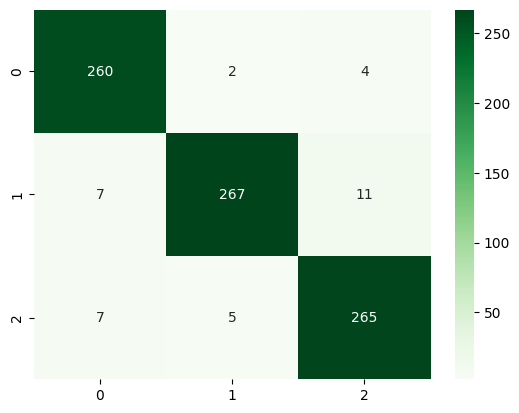

In [35]:
ConfusionMatrix = confusion_matrix(test_df['sentiment'], prediction_linear)
sns.heatmap(ConfusionMatrix, annot=True, fmt='d', cmap='Greens', cbar=True)
plt.show()